In [1]:
import pandas as pd
import numpy as np
from math import sqrt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MaxAbsScaler, MinMaxScaler, StandardScaler
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import cm
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
from figsave import save_fig

## Datan

In [10]:
data_sp = pd.read_csv('Spritzer2_MDK1.csv').set_index('pktnum').reset_index(drop = True)
data_sp

,ETS,ETp,Fs1,Fs2,GQ,Isoll,MET,Pmax,Pv,Qdot,Qsgf,R10,R90,dF,dI,dP,dR,dt,ser,zustand
0,0.159677,0.230052,1.327044,0.494029,6.580603,7.0,0.230052,11.647067,6.611996,10.921016,201.135383,0.188530,0.189323,0.481558,0.041080,1.838532,0.000000,0.000400,1.421698,0
1,0.071673,0.235397,1.867522,0.613541,8.058648,8.0,0.235397,14.806702,8.772066,14.173666,237.190151,0.192262,0.168727,0.489309,0.065693,3.288823,0.000000,0.017594,1.268833,0
2,0.009919,0.333555,2.037245,0.996015,9.150587,9.0,0.380232,17.023084,11.165760,16.177417,267.475472,0.167568,0.152430,0.516442,0.067315,4.035082,0.000000,0.019232,1.176969,0
3,-0.033175,0.347793,1.926337,0.769995,9.171635,9.0,0.393688,16.906575,7.773755,16.252047,268.390116,0.175241,0.152957,0.487382,0.053275,3.897838,0.000000,0.019888,1.185643,0
4,-0.045831,0.291944,2.009438,0.986593,9.263488,9.0,0.399056,17.368844,8.045825,16.652886,265.581238,0.187903,0.151388,0.476116,0.078741,4.494558,0.000000,0.023927,1.155806,0
5,-0.020616,0.360635,1.880511,0.924692,9.230887,9.0,0.434080,17.187210,7.876855,16.415128,266.075243,0.184865,0.151418,0.504071,0.071320,4.372442,0.000000,0.020891,1.177855,0
6,-0.012161,0.385169,2.025818,0.869319,9.203757,9.0,0.406707,17.398576,12.642384,16.420157,266.814446,0.177385,0.152412,0.515571,0.064810,4.511688,0.000000,0.021793,1.193636,0
7,-0.050416,0.228620,2.351561,1.040248,9.197832,9.0,0.289632,17.766765,12.910503,16.564471,266.569471,0.181043,0.151896,0.534722,0.063335,4.924711,0.000000,0.024419,1.140216,0
8,0.093274,0.338732,2.455238,0.743110,9.503843,9.0,0.338732,18.397160,13.285752,16.973417,283.012639,0.178705,0.150857,0.541748,0.102522,5.094687,0.000000,0.022294,1.166469,0
9,0.092826,0.347462,2.436022,1.008793,9.631313,9.2,0.406499,18.621348,9.519445,17.548926,274.950303,0.189571,0.148397,0.524622,0.062051,5.365635,0.000000,0.027683,1.150190,0


In [11]:
data_sp.columns

Index(['ETS', 'ETp', 'Fs1', 'Fs2', 'GQ', 'Isoll', 'MET', 'Pmax', 'Pv', 'Qdot',
       'Qsgf', 'R10', 'R90', 'dF', 'dI', 'dP', 'dR', 'dt', 'ser', 'zustand'],
      dtype='object')

In [12]:
data_sp.ETS.loc[data_sp.ETS<0] = 0
data_sp.ETp.loc[data_sp.ETp<0] = 0
data_sp.MET.loc[data_sp.MET<0] = 0
data_sp_X = data_sp.drop(columns='zustand')

C:\Users\Luxc\Anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [13]:
scaler = MaxAbsScaler()
data_sp_X = pd.DataFrame(scaler.fit_transform(data_sp_X), columns = data_sp_X.columns, index = data_sp_X.index).drop(columns = ['dR','ETS'])

In [14]:
data_sp_X.shape

(50, 17)

In [15]:
data_sp_X.head()

,ETp,Fs1,Fs2,GQ,Isoll,MET,Pmax,Pv,Qdot,Qsgf,R10,R90,dF,dI,dP,dt,ser
0,0.214638,0.482212,0.024666,0.590682,0.7,0.032527,0.529314,0.330059,0.546412,0.608843,0.980587,1.000000,0.395241,0.081265,0.252543,0.010344,1.000000
1,0.219625,0.678607,0.030633,0.723353,0.8,0.033283,0.672908,0.437886,0.709152,0.717982,1.000000,0.891211,0.401603,0.129954,0.451757,0.454883,0.892477
2,0.311206,0.740280,0.049729,0.821366,0.9,0.053761,0.773634,0.557375,0.809406,0.809656,0.871561,0.805132,0.423872,0.133162,0.554264,0.497220,0.827861
3,0.324491,0.699979,0.038445,0.823256,0.9,0.055663,0.768339,0.388052,0.813140,0.812425,0.911467,0.807917,0.400022,0.105388,0.535412,0.514185,0.833963
4,0.272383,0.730176,0.049259,0.831501,0.9,0.056422,0.789347,0.401633,0.833195,0.803922,0.977328,0.799628,0.390775,0.155765,0.617378,0.618609,0.812975


In [16]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(data_sp_X)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.90)+1
d

4

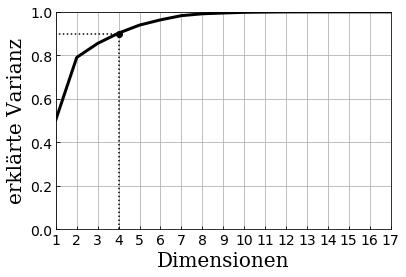

In [17]:
font = {'family': 'serif',
        'size': 20
        }
prop={'family': 'serif', 'size':10}

plt.figure(figsize=(6,4))
plt.plot(np.arange(1,18),cumsum, linewidth=3,color = 'k')
plt.xticks(np.arange(1,18))
plt.axis([1, data_sp_X.shape[1], 0, 1])
# plt.axis([1, 16, 0, 1])
plt.xlabel("Dimensionen", fontdict=font)
plt.ylabel("erklärte Varianz", fontdict=font)
plt.tick_params(axis='both', which='major', labelsize=14, direction='in')
plt.tick_params(direction="in")
plt.plot([d, d], [0, 0.90], "k:")
plt.plot([0, d], [0.90, 0.90], "k:")
plt.plot(d, 0.90, "ko")
# plt.annotate("Elbow", xy=(6, 0.95), xytext=(7, 0.8),
#              arrowprops=dict(arrowstyle="->"), fontsize=16)
plt.grid(True)
# save_fig(image_path='C:/DA/Code/pywt/images/MDK2', fig_name='pca_sp',reselution=200)
plt.show()

In [18]:
pca = PCA(n_components =d)
X_reduced_pca = pca.fit_transform(data_sp_X)
X_reduced_pca.shape

(50, 4)

In [19]:
# X_reduced_2 = data_sp_X[['dI','Fs2']].values
# X_reduced_2

## Kmeans 

In [20]:
from sklearn.cluster import KMeans

In [21]:
kmeans_per_pca = [KMeans(n_clusters=k, random_state=42).fit(X_reduced_pca)
                for k in range(1, 10)]
inertias_pca = [model.inertia_ for model in kmeans_per_pca]

In [1029]:
# kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X_reduced_2)
#                 for k in range(1, 10)]
# inertias2F = [model.inertia_ for model in kmeans_per_k]

In [1030]:
# inertiasPCA = inertiasPCA
# inertias2F = inertias2F

Text(0, 0.5, 'Summe der Entfernungen zum nächsten Schwerpunkt')

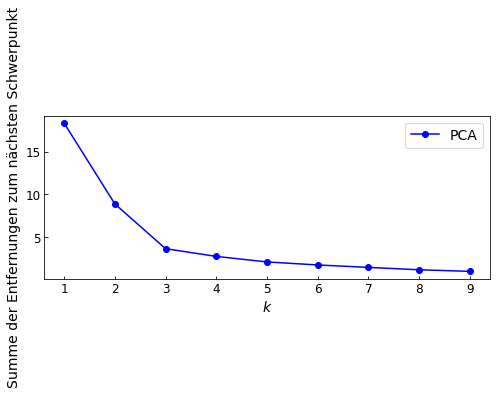

In [22]:
font = {'family': 'serif',
        'size': 20
        }
prop={'family': 'serif', 'size':10}

plt.figure(figsize=(8, 3))
plt.plot(range(1, 10), inertias_pca, "bo-",label = 'PCA')
# plt.plot(range(1, 10), inertias2F, "rs-", label = '$\Delta I$ und $S_{2}$')
plt.legend(fontsize=14)
plt.tick_params(direction="in")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Summe der Entfernungen zum nächsten Schwerpunkt", fontsize=14)

In [26]:
# from sklearn.metrics import silhouette_score
# silhouette_scores2F = [silhouette_score(X_reduced_2, model.labels_)
#                      for model in kmeans_per_k[1:]]
# print(len(X_reduced))

In [25]:
from sklearn.metrics import silhouette_score
silhouette_scores_pca = [silhouette_score(X_reduced_pca, model.labels_)
                     for model in kmeans_per_pca[1:]]
# print(len(X_reduced))

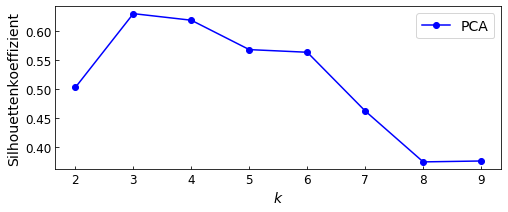

In [28]:
plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores_pca, "bo-",label = 'PCA')
# plt.plot(range(2, 10), silhouette_scores2F, "rs-", label = '$\Delta I$ und $S_{2}$')
plt.xlabel("$k$", fontsize=14)
plt.legend(fontsize=14)
plt.tick_params(direction="in")
plt.ylabel("Silhouettenkoeffizient", fontsize=14)
# plt.axis([1.8, 8.5, 0.55, 0.7])
plt.show()

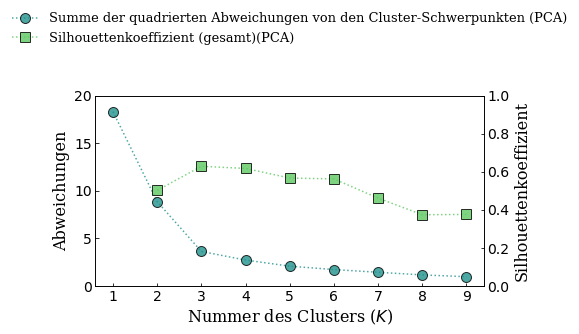

In [33]:

n = 5
colors = cm.viridis(np.linspace(0,1,n))
font = {'family': 'serif',
        'size': 16
        }
prop={'family': 'serif', 'size':13}
fig, host = plt.subplots(figsize = (8,3.5))
fig.subplots_adjust(right=0.8)
par1 = host.twinx()
# p1, = host.plot(range(1, 10), inertias2F, "o-", color = colors[0], label="Summe der quadrierten Abweichungen von den Cluster-Schwerpunkten ($\Delta I$,$S_{2}$)",alpha = .8 ,markersize=10,mec = 'k')
p3, = host.plot(range(1, 10), inertias_pca, "o:", color = colors[2], label="Summe der quadrierten Abweichungen von den Cluster-Schwerpunkten (PCA)",alpha = .8 ,markersize=10,mec = 'k')
# p2, = par1.plot(range(2, 10), silhouette_scores2F, "s-", color = colors[1], label="Silhouettenkoeffizient (gesamt)($\Delta I$,$S_{2}$)",markersize=10,mec = 'k',alpha = .8)
p4, = par1.plot(range(2, 10), silhouette_scores_pca, "s:", color = colors[3], label="Silhouettenkoeffizient (gesamt)(PCA)",markersize=10,mec = 'k',alpha = .8)

# p3, = par1.plot(3, max(silhouette_scores2F), "s-",color = colors[1], mec = 'lime',markersize=11, markeredgewidth = 2 )
# p4, = host.plot(3, inertias2F[2], "o-",color = colors[0], mec = 'lime',markersize=11, markeredgewidth = 2 )
host.tick_params(axis='both', which='major', labelsize=14, direction='in')
par1.tick_params(axis='both', which='major', labelsize=14, direction='in')
host.set_xlabel("Nummer des Clusters ($K$)",fontdict = font)
host.set_ylabel("Abweichungen", fontdict = font)
par1.set_ylabel("Silhouettenkoeffizient",fontdict = font)
# host.yaxis.label.set_color(p1.get_color())
# par1.yaxis.label.set_color(p2.get_color())
tkw = dict(size=4, width=1.5)
tkwx = dict(size=0.1, width=0.1)
# host.tick_params(axis ='y', colors=p1.get_color(), **tkw)
# par1.tick_params(axis ='y', colors=p2.get_color(), **tkw)
host.set_ylim(0,20)
par1.set_ylim(0,1)
lines = [ p3, p4]
plt.gca().legend(lines, [l.get_label() for l in lines],loc='upper center', bbox_to_anchor=(0.5,1.5),frameon=False,ncol=1, prop = prop)
# save_fig(image_path = 'C:/DA/Code/pywt/images/MDK2', fig_name = 'abweichung_mdk2',reselution = 200)


In [34]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=8,label = 'Daten')

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=50, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=50, linewidths=50,
                color=cross_color, zorder=11, alpha=1, label = 'Schwerpunkt')
    
def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="viridis", alpha = 0.5)
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k', )
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

In [35]:
def plot_clusterer_comparison(clusterer1, clusterer2, X, title1=None, title2=None):
    clusterer1.fit(X)
    clusterer2.fit(X)

    plt.figure(figsize=(10, 3.2))

    plt.subplot(121)
    plot_decision_boundaries(clusterer1, X)
    if title1:
        plt.title(title1, fontsize=14)

    plt.subplot(122)
    plot_decision_boundaries(clusterer2, X, show_ylabels=False)
    if title2:
        plt.title(title2, fontsize=14)

50
50
50
50


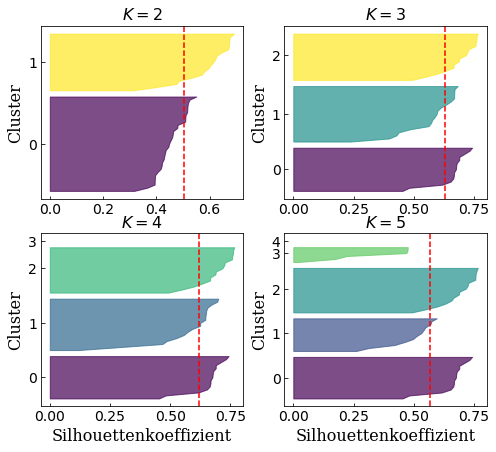

In [40]:
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter

plt.figure(figsize=(8, 7))

for k in (2,3,4,5):
    plt.subplot(2, 2, k - 1)
    
    y_pred = kmeans_per_pca[k - 1].labels_
    print(len(y_pred))
    silhouette_coefficients = silhouette_samples(X_reduced_pca, y_pred)

    padding = len(X_reduced_pca) // 30
    pos = padding
    ticks = []
    colors = mpl.cm.viridis(np.linspace(0,1,k))
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()
        color = colors[i]
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    plt.ylabel("Cluster",fontdict=font)
    if k in (4, 5):
        
        plt.xlabel("Silhouettenkoeffizient",fontdict=font)
#     else:
#         plt.tick_params(labelbottom=False)
#     plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    plt.axvline(x=silhouette_scores_pca[k - 2], color="red", linestyle="--")
    plt.title("$K={}$".format(k), fontdict=font)
#     plt.ticklabel_format(style='sci', axis='x', scilimits=(0,2))
    plt.tick_params(axis='both', which='major', labelsize=14, direction='in')
# save_fig(image_path = 'C:/DA/Code/pywt/images/MDK2', fig_name = 'Silhouettenkoeffizient_pca',reselution = 200)
plt.show()

In [41]:
# font = {'family': 'serif',
#         'size': 20
#         }

# plot_decision_boundaries(kmeans_per_k[3-1], X_reduced_2)
# plt.xlabel('$\Delta I_{Norm.}$',fontdict=font)
# plt.ylabel('$S_{2\,Norm.}$', rotation = '90',fontdict=font)
# plt.tick_params(axis='both', which='major', labelsize=14, direction='in')
# plt.legend(prop = prop)
# # plt.axis("off")
# save_fig(image_path = 'C:/DA/Code/pywt/images/MDK2', fig_name = '2d_class_mdk2',reselution = 200)
# plt.show()

In [44]:
model = kmeans_per_pca[3-1].fit(X_reduced_pca)
y_pred = model.labels_
y_pred_df = pd.DataFrame(y_pred)
# y_pred = y_pred_df.replace([1,2],[2,1]).iloc[:,0].values
y_pred = y_pred_df.replace([1,0,2],[0,2,1]).iloc[:,0].values
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 1, 2, 1, 1, 2, 2, 2,
       1, 1, 0, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 0, 2, 1, 1, 1, 2, 1, 1, 1,
       0, 0, 0, 1, 1, 0], dtype=int64)

In [47]:
y_test = data_sp.zustand.values
y_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 1, 2, 1, 1, 2, 2, 2,
       1, 1, 0, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 0, 2, 1, 1, 1, 2, 1, 1, 1,
       0, 0, 0, 1, 1, 0], dtype=int64)

[0 1 2]


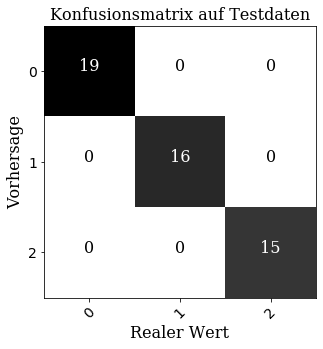

In [46]:
from sklearn.metrics import confusion_matrix
import itertools

matrix = confusion_matrix(y_pred, y_test)

labels = np.unique(y_test)
print(labels)
# labels = ['ohne','klein','stark']
plt.figure(figsize=(8, 5))
plt.imshow(matrix, interpolation="nearest", cmap=plt.cm.gray_r)

plt.title("Konfusionsmatrix auf Testdaten",fontdict = font)
plt.ylabel("Vorhersage",fontdict=font)
plt.xlabel("Realer Wert",fontdict=font)

tick_marks = np.arange(len(labels))

plt.xticks(tick_marks, labels, rotation=45,fontsize = 14)
plt.yticks(tick_marks, labels,fontsize = 14)
fmt = "d"
thresh = matrix.max() / 2.0

for i, j in itertools.product(range(matrix.shape[0]), range(matrix.shape[1])):
    plt.text(
        j,
        i,
        format(matrix[i, j], fmt),
        horizontalalignment="center",
        color="white" if matrix[i, j] > thresh else "black", 
        fontdict = font
    )
# save_fig(image_path='C:/DA/Code/pywt/images/MDK2', fig_name='svm_pca_konfusion_',reselution=200)    
plt.show()

In [49]:
data_sp = data_sp_X.copy()
data_sp['zustand'] = y_pred
data_sp.head()

,ETp,Fs1,Fs2,GQ,Isoll,MET,Pmax,Pv,Qdot,Qsgf,R10,R90,dF,dI,dP,dt,ser,zustand
0,0.214638,0.482212,0.024666,0.590682,0.7,0.032527,0.529314,0.330059,0.546412,0.608843,0.980587,1.000000,0.395241,0.081265,0.252543,0.010344,1.000000,0
1,0.219625,0.678607,0.030633,0.723353,0.8,0.033283,0.672908,0.437886,0.709152,0.717982,1.000000,0.891211,0.401603,0.129954,0.451757,0.454883,0.892477,0
2,0.311206,0.740280,0.049729,0.821366,0.9,0.053761,0.773634,0.557375,0.809406,0.809656,0.871561,0.805132,0.423872,0.133162,0.554264,0.497220,0.827861,0
3,0.324491,0.699979,0.038445,0.823256,0.9,0.055663,0.768339,0.388052,0.813140,0.812425,0.911467,0.807917,0.400022,0.105388,0.535412,0.514185,0.833963,0
4,0.272383,0.730176,0.049259,0.831501,0.9,0.056422,0.789347,0.401633,0.833195,0.803922,0.977328,0.799628,0.390775,0.155765,0.617378,0.618609,0.812975,0


## Varianz

In [84]:
x_label = ['$e_{pe}$', '$S_{1}$', '$S_{2}$','$Q_{ges}$','$I_{soll}$',
           '$\Delta e_{max}$','$P_{max}$','$P_{v}$','$\dot Q$','$Q_{30}$',
           '$R_{10}$','$R_{-10}$','$\Delta F$','$\Delta I$','$\Delta P$', '$\Delta t$',
           'ρ','zustand']
len(x_label)

18

In [85]:
data_sp = pd.read_csv('Spritzer2_MDK1.csv').set_index('pktnum').reset_index(drop = True).drop(columns = ['ETS','dR'])
data_sp.shape

(50, 18)

In [86]:
# data_sp.ETS.loc[data_sp.ETS<0] = 0
data_sp.ETp.loc[data_sp.ETp<0] = 0
data_sp.MET.loc[data_sp.MET<0] = 0
data_sp.columns = x_label
data_sp_X = data_sp.drop(columns='zustand')

C:\Users\Luxc\Anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [87]:
scaler = MaxAbsScaler()
data_sp_X = pd.DataFrame(scaler.fit_transform(data_sp_X), columns = data_sp_X.columns, index = data_sp_X.index)
data_sp_gpby = data_sp_X.copy()
data_sp_gpby['zustand'] = y_pred

In [88]:
data_sp_gpby.tail()

,$e_{pe}$,$S_{1}$,$S_{2}$,$Q_{ges}$,$I_{soll}$,$\Delta e_{max}$,$P_{max}$,$P_{v}$,$\dot Q$,$Q_{30}$,$R_{10}$,$R_{-10}$,$\Delta F$,$\Delta I$,$\Delta P$,$\Delta t$,ρ,zustand
45,0.529486,0.550483,0.046774,0.942091,1.00,0.080240,0.922331,0.536734,0.920908,0.923720,0.807853,0.745157,0.365791,0.091749,0.771688,0.442988,0.818415,0
46,0.610859,0.447017,0.045334,0.930927,1.00,0.092571,0.898850,0.503363,0.898579,0.937063,0.783880,0.739244,0.333751,0.082342,0.717448,0.352186,0.833089,0
47,0.873065,0.656626,0.339466,0.904338,0.99,0.191654,0.879377,0.634306,0.923313,0.814498,0.846799,0.662695,1.000000,0.457186,0.879560,0.758234,0.815317,1
48,0.753401,0.777500,0.383252,0.856999,0.96,0.167567,0.881762,0.864884,0.886412,0.795949,0.797853,0.685219,0.967765,0.506816,0.924576,0.847450,0.809160,1
49,0.473080,0.570060,0.056865,0.874119,0.94,0.071692,0.815220,0.447323,0.848711,0.855344,0.826636,0.769045,0.400110,0.171054,0.593704,0.390699,0.830033,0


In [89]:
data_sp_gpby = data_sp_gpby.groupby(by = 'zustand')[list(data_sp_gpby)[:-1]].mean()
data_sp_gpby

,$e_{pe}$,$S_{1}$,$S_{2}$,$Q_{ges}$,$I_{soll}$,$\Delta e_{max}$,$P_{max}$,$P_{v}$,$\dot Q$,$Q_{30}$,$R_{10}$,$R_{-10}$,$\Delta F$,$\Delta I$,$\Delta P$,$\Delta t$,ρ
zustand,,,,,,,,,,,,,,,,,
0,0.346325,0.70961,0.045313,0.856966,0.917895,0.057885,0.819490,0.526182,0.846848,0.842421,0.903952,0.792247,0.401620,0.133007,0.639506,0.509546,0.822647
1,0.848387,0.78598,0.246920,0.906794,0.976250,0.239186,0.894387,0.777748,0.929628,0.811685,0.889449,0.682031,0.932010,0.284577,0.927689,0.785700,0.832382
2,0.563507,0.80639,0.591309,0.892967,0.971333,0.122020,0.889329,0.584601,0.926472,0.902388,0.901274,0.759065,0.665382,0.821482,0.712992,0.867182,0.842991


In [90]:
data_sp_gpby

,$e_{pe}$,$S_{1}$,$S_{2}$,$Q_{ges}$,$I_{soll}$,$\Delta e_{max}$,$P_{max}$,$P_{v}$,$\dot Q$,$Q_{30}$,$R_{10}$,$R_{-10}$,$\Delta F$,$\Delta I$,$\Delta P$,$\Delta t$,ρ
zustand,,,,,,,,,,,,,,,,,
0,0.346325,0.70961,0.045313,0.856966,0.917895,0.057885,0.819490,0.526182,0.846848,0.842421,0.903952,0.792247,0.401620,0.133007,0.639506,0.509546,0.822647
1,0.848387,0.78598,0.246920,0.906794,0.976250,0.239186,0.894387,0.777748,0.929628,0.811685,0.889449,0.682031,0.932010,0.284577,0.927689,0.785700,0.832382
2,0.563507,0.80639,0.591309,0.892967,0.971333,0.122020,0.889329,0.584601,0.926472,0.902388,0.901274,0.759065,0.665382,0.821482,0.712992,0.867182,0.842991


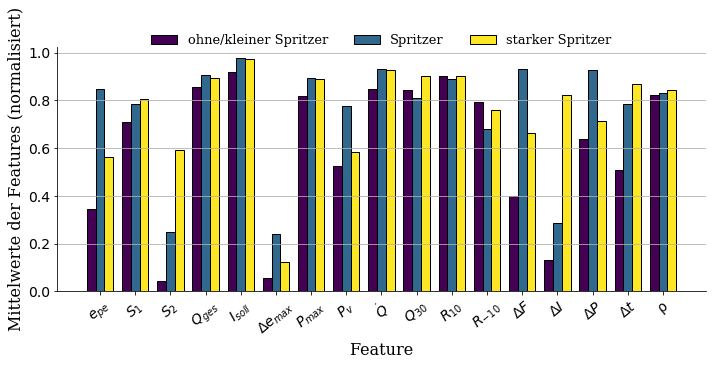

In [91]:
labels = ['$e_{pe}$', '$S_{1}$', '$S_{2}$','$Q_{ges}$','$I_{soll}$',
           '$\Delta e_{max}$','$P_{max}$','$P_{v}$','$\dot Q$','$Q_{30}$',
           '$R_{10}$','$R_{-10}$','$\Delta F$','$\Delta I$','$\Delta P$', '$\Delta t$',
           'ρ']

mean_0 = data_sp_gpby.iloc[0,:].values
mean_1 = data_sp_gpby.iloc[1,:].values
mean_2 = data_sp_gpby.iloc[2,:].values

n = 4
colors = cm.viridis(np.linspace(0,1,n))


x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots(figsize = (10,5))
rects0 = ax.bar(x - width, mean_0, width, label='ohne/kleiner Spritzer',color = colors[0],ec='k')
rects1 = ax.bar(x, mean_1, width, label='Spritzer', color = colors[1],ec='k')
rects2 = ax.bar(x + width, mean_2, width, label='starker Spritzer', color =colors[3],ec='k')
# # Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Mittelwerte der Features (normalisiert)',fontdict = font)
ax.set_xticks(x)
ax.set_xlabel('Feature',fontdict = font)
ax.set_xticklabels(labels)
ax.legend(loc='upper center', bbox_to_anchor=(0.5,1.10),frameon=False,ncol=3, prop = prop)
ax.tick_params(axis='both', which='major', labelsize=14)
ax.tick_params(axis='x', rotation = 40)
# def autolabel(rects):
#     """Attach a text label above each bar in *rects*, displaying its height."""
#     for rect in rects:
#         height = rect.get_height()
#         ax.annotate('{}'.format(height),
#                     xy=(rect.get_x() + rect.get_width() / 2, height),
#                     xytext=(0, 3),  # 3 points vertical offset
#                     textcoords="offset points",
#                     ha='center', va='bottom')


# autolabel(rects0)
# autolabel(rects1)
# autolabel(rects2)
ax.grid(axis = 'y')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
fig.tight_layout()
# save_fig(image_path = 'C:/DA/Code/pywt/images/MDK2', fig_name = 'Mittelwerte_Features_mdk2',reselution = 200)
plt.show()

In [93]:
var_gpby = np.var(data_sp_gpby.values,axis=0)
var_gpby

array([4.22657171e-02, 1.73502030e-03, 5.08179358e-02, 4.41121525e-04,
       6.98354883e-04, 5.63459236e-03, 1.16807197e-03, 1.15560284e-02,
       1.46692478e-03, 1.41866149e-03, 3.97027960e-05, 2.13144062e-03,
       4.68860247e-02, 8.72486947e-02, 1.49493479e-02, 2.34226171e-02,
       6.90182731e-05])

In [94]:
var_dict = dict(zip(list(data_sp_gpby),list(np.var(data_sp_gpby.values,axis=0))))

In [95]:
sort_orders = sorted(var_dict.items(), key=lambda x: x[1], reverse=True)
sort_orders
feature = [i[0] for i in sort_orders]
var = [i[1] for i in sort_orders]

(0, 0.1)

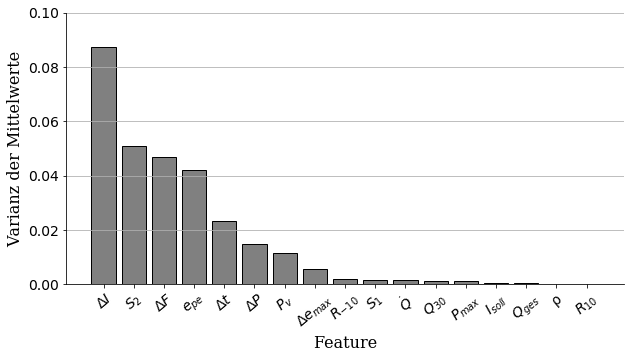

In [96]:
fig, ax = plt.subplots(figsize = (10,5))
ax.bar(feature,height = var, ec = 'k',color = 'gray')
ax.set_xlabel('Feature',fontdict = font ) 
ax.set_ylabel('Varianz der Mittelwerte',fontdict = font)
ax.tick_params(axis='both', which='major', labelsize=14)
ax.tick_params(axis='x', rotation = 40)
ax.set_yticks(np.arange(0,0.16,0.02))
ax.grid(axis = 'y')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
# save_fig(image_path = 'C:/DA/Code/pywt/images/MDK2', fig_name = 'Var_Feaures_2',reselution = 200)
ax.set_ylim(0,0.1)

In [103]:
columns = ['$\Delta I$','$e_{pe}$', '$S_{2}$','$\Delta F$','zustand']
# data_sp_var = data_sp[feature[:2]]
data_sp_var = data_sp[columns]
data_sp_var['zustand'] = y_pred
data_sp_var.head()


C:\Users\Luxc\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,$\Delta I$,$e_{pe}$,$S_{2}$,$\Delta F$,zustand
0,0.041080,0.230052,0.494029,0.481558,0
1,0.065693,0.235397,0.613541,0.489309,0
2,0.067315,0.333555,0.996015,0.516442,0
3,0.053275,0.347793,0.769995,0.487382,0
4,0.078741,0.291944,0.986593,0.476116,0


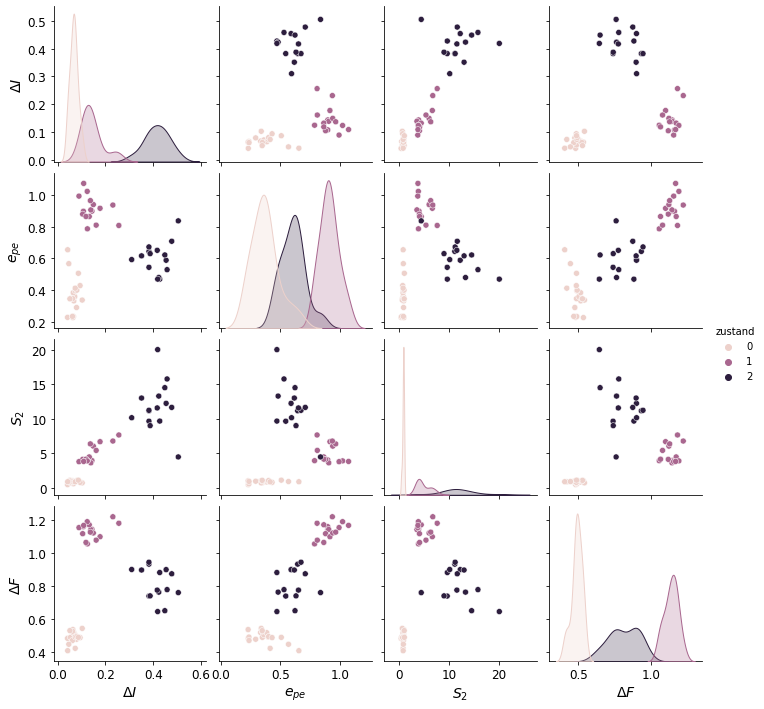

In [104]:
sns.pairplot(data_sp_var, hue="zustand")

## schlüsselfeature 

**sehe sublim dataplot**

In [108]:
# data_s_key_feature = data_sp[feature[:2]]
data_s_key_feature = data_sp[columns]
data_s_key_feature['zustand'] = y_pred
delta_f = data_s_key_feature.iloc[:,[3,-1]]
delta_I = data_s_key_feature.iloc[:,[0,-1]]
delta_s2 = data_s_key_feature.iloc[:,[1,-1]]
epe = data_s_key_feature.iloc[:,[2,-1]]

C:\Users\Luxc\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [109]:
data_s_key_feature

,$\Delta I$,$e_{pe}$,$S_{2}$,$\Delta F$,zustand
0,0.041080,0.230052,0.494029,0.481558,0
1,0.065693,0.235397,0.613541,0.489309,0
2,0.067315,0.333555,0.996015,0.516442,0
3,0.053275,0.347793,0.769995,0.487382,0
4,0.078741,0.291944,0.986593,0.476116,0
5,0.071320,0.360635,0.924692,0.504071,0
6,0.064810,0.385169,0.869319,0.515571,0
7,0.063335,0.228620,1.040248,0.534722,0
8,0.102522,0.338732,0.743110,0.541748,0
9,0.062051,0.347462,1.008793,0.524622,0


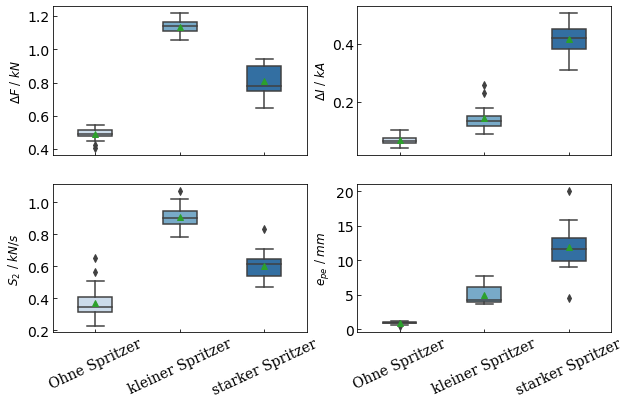

In [111]:
font = {'family': 'serif',
        'size': 12
        }
prop={'family': 'serif', 'size':13}
fig, ((ax1, ax2), (ax3, ax4))  = plt.subplots(2, 2, figsize=(10, 6),sharex=True)
# fig, (ax2, ax3)  = plt.subplots(1, 2, figsize=(10, 3),sharex=True)
sns.boxplot(x = delta_f.zustand, y = delta_f.iloc[:,0],showmeans=True,width=0.4,ax = ax1,palette = sns.color_palette("Blues",3))
ax1.set_ylabel('$\Delta F$ / $kN$',fontdict = font)
ax1.tick_params(direction='in')
ax1.set_xlabel('')
ax1.tick_params(axis='both', which='major', labelsize=14)
sns.boxplot(x = delta_I.zustand, y = delta_I.iloc[:,0],showmeans=True,width=0.4,ax = ax2,palette = sns.color_palette("Blues", 3))
ax2.set_ylabel('$\Delta I$ / $kA$',fontdict = font)
ax2.tick_params(direction='in')
ax2.set_xlabel('')
ax2.set_xticklabels(['Ohne/kleiner Spritzer','Spritzer','starker Spritzer'], rotation = '25',fontdict =font)

ax2.tick_params(axis='both', which='major', labelsize=14)
sns.boxplot(x = delta_s2.zustand, y = delta_s2.iloc[:,0],showmeans=True,width=0.4,ax = ax3,palette = sns.color_palette("Blues", 3))
ax3.set_ylabel('$S_{2}$ / $kN/s$',fontdict = font)
ax3.tick_params(direction='in')
ax3.set_xlabel('')
ax3.set_xticklabels(['Ohne/kleiner Spritzer','Spritzer','starker Spritzer'], rotation = '25',fontdict =font)
ax3.tick_params(axis='both', which='major', labelsize=14)

sns.boxplot(x = epe.zustand, y = epe.iloc[:,0],showmeans=True,width=0.4,ax = ax4,palette = sns.color_palette("Blues", 3))
ax4.set_ylabel('$e_{pe}}$ / $mm$',fontdict = font)
ax4.tick_params(direction='in')
ax4.set_xlabel('')
ax4.set_xticklabels(['Ohne Spritzer','kleiner Spritzer','starker Spritzer'], rotation = '25',fontdict =font)
ax4.tick_params(axis='both', which='major', labelsize=14)
# save_fig(image_path = 'C:/DA/Code/pywt/images/MDK2', fig_name = 'key_feature_mdk2',reselution = 200)

C:\Users\Luxc\Anaconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


Text(0.5, 11.0, '$\\Delta F$ / $kN$')

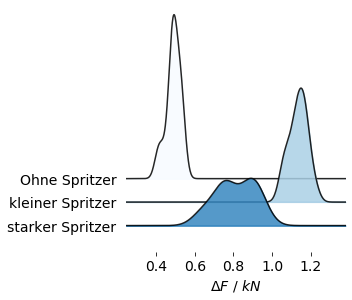

In [112]:
import joypy
delta_f.zustand = delta_f.zustand.replace([0,1,2],['Ohne Spritzer','kleiner Spritzer','starker Spritzer'])
delta_I.zustand = delta_I.zustand.replace([0,1,2],['Ohne/kleiner Spritzer','Spritzer','starker Spritzer'])
delta_s2.zustand = delta_s2.zustand.replace([0,1,2],['Ohne/kleiner Spritzer','Spritzer','starker Spritzer'])
epe.zustand = epe.zustand.replace([0,1,2],['Ohne Spritzer','kleiner Spritzer','starker Spritzer'])
ax1 = joypy.joyplot(delta_f, by="zustand",figsize=(5,4),overlap=3.5,colormap = cm.Blues,xlabelsize = 14,ylabelsize = 14,alpha = 0.85)
plt.xlabel('$\Delta F$ / $kN$')
# save_fig(image_path = 'C:/DA/Code/pywt/images/MDK2', fig_name = 'k_df',reselution = 200)

Text(0.5, 11.0, '$\\Delta I$ / $kA$')

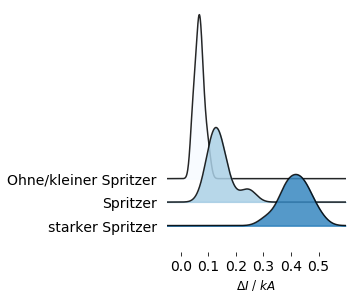

In [113]:
ax2 = joypy.joyplot(delta_I, by="zustand",figsize=(5,4),overlap=3.5,colormap = cm.Blues,xlabelsize = 14,ylabelsize = 14,alpha = 0.85,)
plt.xlabel('$\Delta I$ / $kA$',fontdict=font)
# save_fig(image_path = 'C:/DA/Code/pywt/images/MDK2', fig_name = 'k_dI_mdk2',reselution = 200)

Text(0.5, 11.0, '$S_{2}$ / $kN/s$')

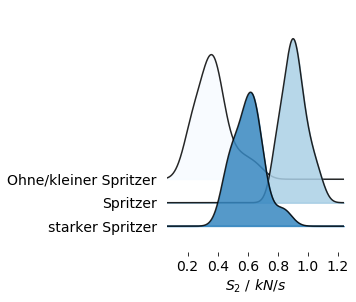

In [114]:
ax3 = joypy.joyplot(delta_s2, by="zustand",figsize=(5,4),overlap=3.5,colormap = cm.Blues,xlabelsize = 14,ylabelsize = 14,alpha = 0.85)
plt.xlabel('$S_{2}$ / $kN/s$')
# save_fig(image_path = 'C:/DA/Code/pywt/images/MDK2', fig_name = 'k_S2_mdk2',reselution = 200)

Text(0.5, 11.0, '$e_{pe}$ / $mm$')

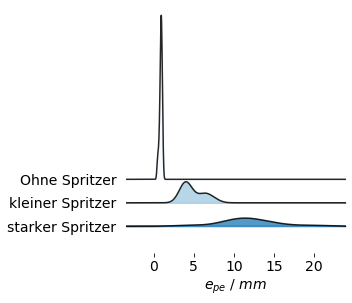

In [115]:
ax4 = joypy.joyplot(epe, by="zustand",figsize=(5,4),overlap=3.5,colormap = cm.Blues,xlabelsize = 14,ylabelsize = 14,alpha = 0.85)
plt.xlabel('$e_{pe}$ / $mm$')
# save_fig(image_path = 'C:/DA/Code/pywt/images/MDK2', fig_name = 'k_epe',reselution = 200)

In [116]:
y_true = data_sp.zustand.values
# y_true = y_true.replace(0,1).values
y_true

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 1, 2, 1, 1, 2, 2, 2,
       1, 1, 0, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 0, 2, 1, 1, 1, 2, 1, 1, 1,
       0, 0, 0, 1, 1, 0], dtype=int64)

In [117]:
from sklearn.metrics import confusion_matrix
import itertools

[0 1 2]


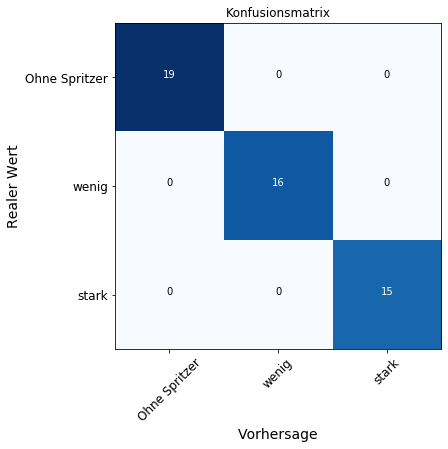

In [118]:
# Erzeuge Matrix
matrix = confusion_matrix(y_true, y_pred)

labels = np.unique(y_true)
print(labels)
labels = ['Ohne Spritzer','wenig','stark']
plt.figure(figsize=(10, 6))
plt.imshow(matrix, interpolation="nearest", cmap=plt.cm.Blues)

plt.title("Konfusionsmatrix")
plt.xlabel("Vorhersage")
plt.ylabel("Realer Wert")

tick_marks = np.arange(len(labels))

plt.xticks(tick_marks, labels, rotation=45)
plt.yticks(tick_marks, labels)
fmt = "d"
thresh = matrix.max() / 2.0

for i, j in itertools.product(range(matrix.shape[0]), range(matrix.shape[1])):
    plt.text(
        j,
        i,
        format(matrix[i, j], fmt),
        horizontalalignment="center",
        color="white" if matrix[i, j] > thresh else "black",  
    )
plt.show()